In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import *
from plotnine import *
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering, dbscan
from sklearn.mixture import GaussianMixture

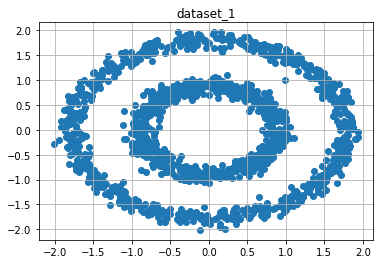

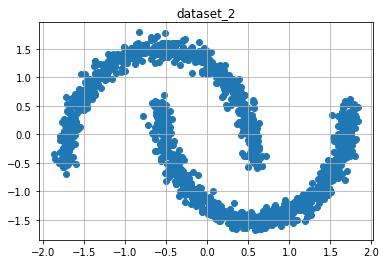

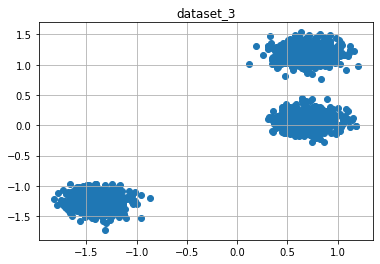

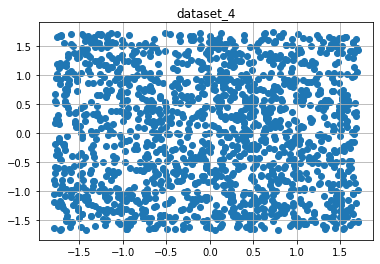

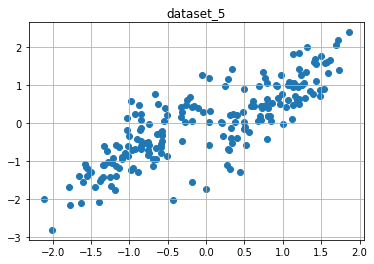

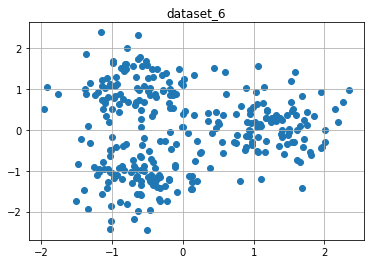

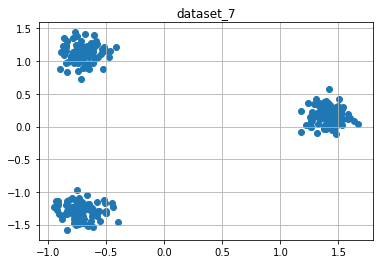

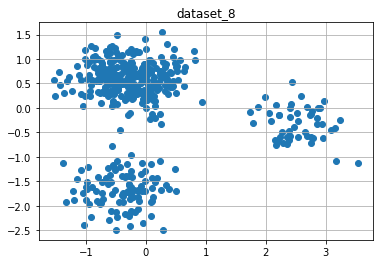

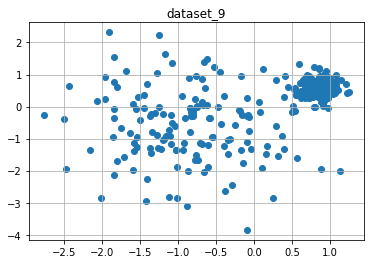

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv", header=None)
dataset6= pd.read_csv("dataset6.csv", header=None)
dataset7= pd.read_csv("dataset7.csv", header=None)
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")

datasets=[dataset1, dataset2, dataset3, dataset4, dataset5, 
          dataset6, dataset7, dataset8, dataset9]

for index, dataset in enumerate(datasets):
    z = StandardScaler()
    data_transofrmed = z.fit_transform(dataset)
    dataset["x"] = data_transofrmed[:, 0]
    dataset["y"] = data_transofrmed[:, 1]
    plt.scatter(dataset['x'], dataset['y'])
    plt.title('dataset_' + str(index+1))
    plt.grid()
    plt.show()

1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

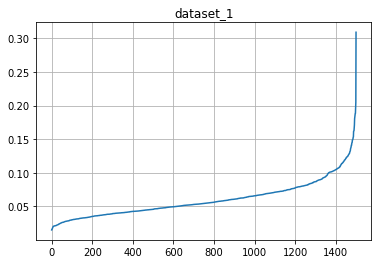

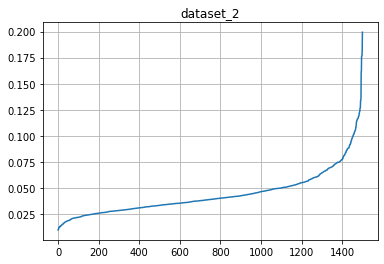

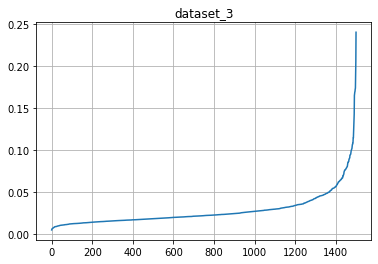

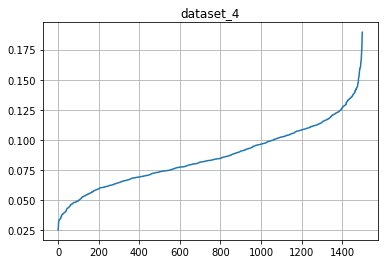

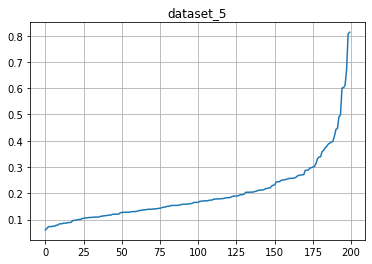

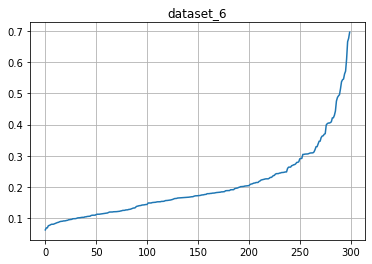

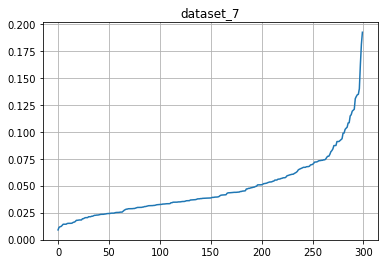

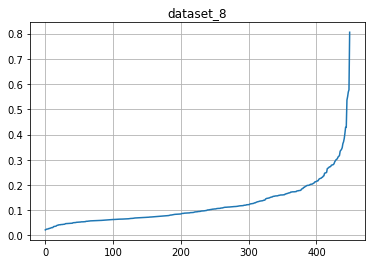

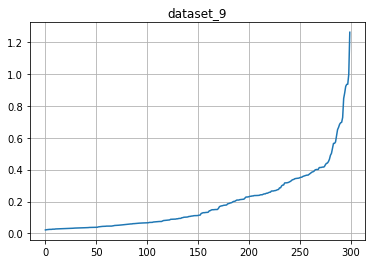

In [3]:
for index, dataset in enumerate(datasets):
    mins = 3
    nn = NearestNeighbors(n_neighbors=4)
    
    nn.fit(dataset[["x", "y"]])
    
    distances, neighbors = nn.kneighbors(dataset[["x", "y"]])
    
    distances = np.sort(distances[:, mins], axis = 0)
    X=list(range(0,len(distances)))
    plt.plot(X,distances)
    plt.title('dataset_'+str(index+1))
    plt.grid()
    plt.show()

# KMeans - Agglomerative - DBSCAN - GMM

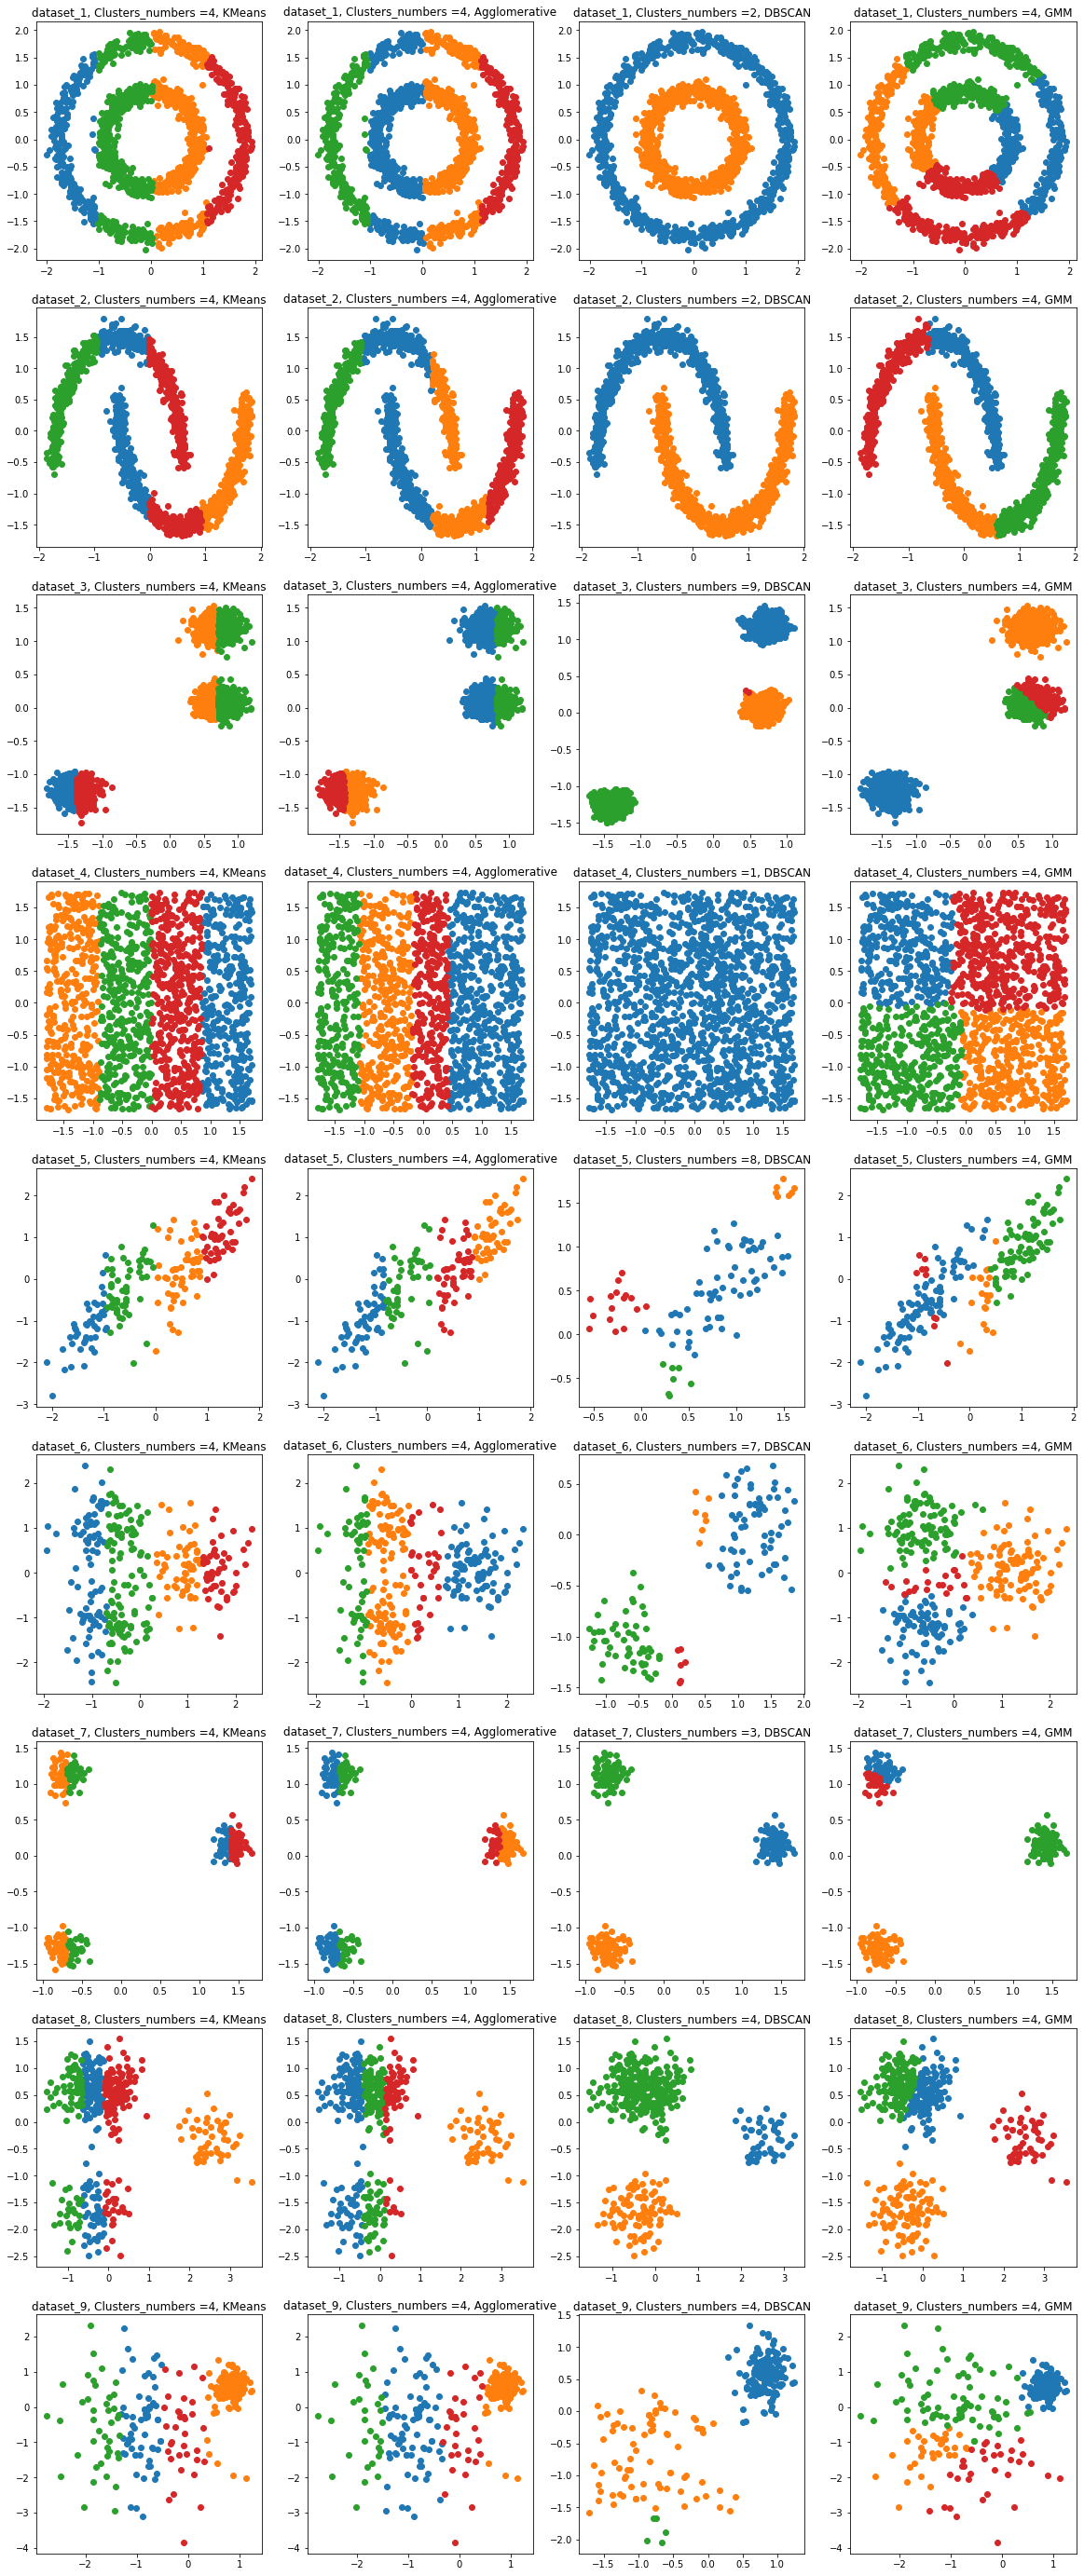

silhouette_score of KMeans at each Dataset [0.19148398076457154, 0.2798873795932611, 0.1501722332433043, 0.1624795638675419, 0.3153463582956437, 0.160001299431296, 0.10845165708351925, 0.19190665965859985, 0.43708506827163895]
silhouette_score of Agglomerative at each Dataset [0.19133064364643337, 0.2693520569719001, 0.1504227511107503, 0.15153947143224875, 0.27708137345323547, 0.17566955967234155, 0.10615478718788031, 0.17480530552005238, 0.42715485772216055]
silhouette_score of DBSCAN at each Dataset [0.11358193498293764, 0.37495447547676636, 0.2174380971425757, 'No_silhouette_score_only_one_cluster', 0.11561654504635852, 0.07831599958192582, 0.9136190507342296, 0.6649370141549555, 0.4107320072576275]
silhouette_score of GMM at each Dataset [0.37350913217375137, 0.4360552676630106, 0.6705561746723273, 0.4086341609323734, 0.17821886537651596, 0.41632099757771246, 0.7296871181388203, 0.49591418697097606, 0.5286334890967785]
kmeans_inertia [112.5778798267112, 84.57714685090498, 14.81362

In [4]:
clusters = 5
def plot_all_datasets(datasets, clusters_number):
    """"
    Draw each dataset clustering using(KMeans, Agglomerative and DBSCAN)
    
    datasets List:
        list of the datasets to be clustered 
    clusters_number int:
        number of clusters
    
    Returen:
        
    """
    silhouette_score = {'KMeans':[], 'Agglomerative':[], 'DBSCAN':[], 'GMM':[]}
    kmeans_inertia = []
    k_means = KMeans(clusters_number)
    agglomerativeClustering = AgglomerativeClustering(clusters_number)
    fig, axis = plt.subplots(9, 4, figsize=(20, 50))
    
    for index, dataset in enumerate(datasets):
        #-----------------------------------------------KMeans----------------------------------------------------#   
        k_means.fit(np.array(dataset['x']).reshape(-1, 1), np.array(dataset['y']).reshape(-1, 1))
        for cluster in range(clusters_number):
            x = dataset[k_means.labels_ == cluster]['x']
            y = dataset[k_means.labels_ == cluster]['y'] 
            axis[int(index)][0].scatter(x, y)
            axis[int(index)][0].grid()
            axis[int(index)][0].set_title('dataset_'+ str(index+1)+ ', Clusters_numbers ='+ str(np.unique(k_means.labels_).size) + ', KMeans')

        #----------------------------------------AgglomerativeClustering------------------------------------------#
        agglomerativeClustering.fit(np.array(dataset['x']).reshape(-1, 1), np.array(dataset['y']).reshape(-1, 1))
        for cluster in range(clusters_number):
            x = dataset[agglomerativeClustering.labels_ == cluster]['x']
            y = dataset[agglomerativeClustering.labels_ == cluster]['y'] 
            axis[int(index)][1].scatter(x, y)
            axis[int(index)][1].grid()
            axis[int(index)][1].set_title('dataset_'+ str(index+1)+ ', Clusters_numbers ='+ str(np.unique(agglomerativeClustering.labels_).size) + ', Agglomerative')
        
        #------------------------------------------------DBSCAN---------------------------------------------------#
        dbscanClustering = dbscan(dataset, eps=0.3)
        for cluster in range(clusters_number):
            x = dataset[dbscanClustering[1] == cluster]['x']
            y = dataset[dbscanClustering[1] == cluster]['y'] 
            axis[int(index)][2].scatter(x, y)
            axis[int(index)][2].grid()
            axis[int(index)][2].set_title('dataset_'+ str(index+1)+ ', Clusters_numbers ='+ str(np.unique(dbscanClustering[1]).size) + ', DBSCAN')
        #-------------------------------------------------GMM----------------------------------------------------#
        gmm = GaussianMixture(n_components=clusters_number)
        gmm.fit(dataset)
        gmm_labels = gmm.predict(dataset)
        for cluster in range(clusters_number):
            x = dataset[gmm_labels == cluster]['x']
            y = dataset[gmm_labels == cluster]['y'] 
            axis[int(index)][3].scatter(x, y)
            axis[int(index)][3].grid()
            axis[int(index)][3].set_title('dataset_'+ str(index+1)+ ', Clusters_numbers ='+ str(np.unique(gmm_labels).size) + ', GMM')
        
        
        if np.unique(dbscanClustering[1]).size > 1:
            silhouette_score['DBSCAN'].append(metrics.silhouette_score(dataset, dbscanClustering[1], metric='euclidean'))
        else:
            silhouette_score['DBSCAN'].append('No_silhouette_score_only_one_cluster')
        
        if np.unique(agglomerativeClustering.labels_).size > 1:
             silhouette_score['Agglomerative'].append(metrics.silhouette_score(dataset, agglomerativeClustering.labels_, metric='euclidean'))
        else: 
            silhouette_score['Agglomerative'].append('No_silhouette_score_only_one_cluster')

        if np.unique(k_means.labels_).size > 1:
             silhouette_score['KMeans'].append(metrics.silhouette_score(dataset, k_means.labels_, metric='euclidean'))
        else: 
            silhouette_score['KMeans'].append('No_silhouette_score_only_one_cluster')
            
        if np.unique(gmm_labels).size > 1:
             silhouette_score['GMM'].append(metrics.silhouette_score(dataset, gmm_labels, metric='euclidean'))
        else: 
            silhouette_score['GMM'].append('No_silhouette_score_only_one_cluster')

        kmeans_inertia.append(k_means.inertia_)
        
    plt.show()

    return silhouette_score, kmeans_inertia


silhouette_score, kmeans_inertia = plot_all_datasets(datasets, clusters_number=4)
for key in silhouette_score:
    print('silhouette_score of {} at each Dataset'.format(key), silhouette_score[key])
    print('===================================================================================================================')
print('kmeans_inertia', kmeans_inertia)